# NBA Analysis

## En este análisis responderemos a la pregunta: ¿El juego de basketball de la NBA ha evolucionado a tiros de 3pts?

### 1.- Importamos la base de datos

In [1]:
# Importar librerías para realizar futuros cálculos
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
#Cargar la base de datos
path='C:\\Users\\Gabo\\Documents\\Gabriel Mendoza\\Business\\Crehana\\Análisis de datos con jupyther notebook\\Módulos\\## Módulo ## - Caso NBA\\NBA Data Base.xlsx'
df=pd.read_excel(path)

In [3]:
#Muestra aleatoria de la base de datos que cargamos
df.sample(5)

,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,Game Type,Season,GAME_NUM,Round
7642,MIA,Miami Heat,2016-02-20,MIA vs. WAS,W,240,114,47,96,0.490,...,23,2,9,7,20,20.0,Regular,22015,Regular,Regular
12012,DET,Detroit Pistons,2019-03-02,DET @ CLE,W,239,129,47,87,0.540,...,27,5,8,9,24,36.0,Regular,22018,Regular,Regular
5731,NOP,New Orleans Pelicans,2015-04-13,NOP @ MIN,W,240,100,37,84,0.440,...,15,6,9,9,23,12.0,Regular,22014,Regular,Regular
13271,MIA,Miami Heat,2020-08-04,MIA vs. BOS,W,239,112,34,77,0.442,...,22,8,5,12,19,6.0,Regular,22019,Regular,Regular
597,BOS,Boston Celtics,2011-02-01,BOS @ SAC,W,240,95,38,85,0.447,...,23,14,3,16,22,5.0,Regular,22010,Regular,Regular


In [4]:
#Revisión de tipo de datos
df.dtypes

TEAM_ABBREVIATION            object
TEAM_NAME                    object
GAME_DATE            datetime64[ns]
MATCHUP                      object
WL                           object
MIN                           int64
PTS                           int64
FGM                           int64
FGA                           int64
FG_PCT                      float64
FG3M                          int64
FG3A                          int64
FG3_PCT                     float64
FTM                           int64
FTA                           int64
FT_PCT                      float64
OREB                          int64
DREB                          int64
REB                           int64
AST                           int64
STL                           int64
BLK                           int64
TOV                           int64
PF                            int64
PLUS_MINUS                  float64
Game Type                    object
Season                       object
GAME_NUM                    

### 2.- Limpieza de la base de datos

In [5]:
# Verifico que no existan valores vacíos
df.isnull().sum()

TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_DATE            0
MATCHUP              0
WL                   0
MIN                  0
PTS                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PLUS_MINUS           0
Game Type            0
Season               0
GAME_NUM             0
Round                0
dtype: int64

In [6]:
# Tomamos las columnas que son de nuestro interés
df=df[['GAME_DATE','TEAM_NAME','PTS','FGM','FGA','FG3M','FG3A']]
df

,GAME_DATE,TEAM_NAME,PTS,FGM,FGA,FG3M,FG3A
0,2011-06-12,Dallas Mavericks,105,41,82,11,26
1,2011-06-09,Dallas Mavericks,112,39,69,13,19
2,2011-06-07,Dallas Mavericks,86,29,73,4,19
3,2011-06-05,Miami Heat,88,34,78,8,19
4,2011-06-02,Dallas Mavericks,95,36,75,6,17
...,...,...,...,...,...,...,...
15771,2021-08-04,Los Angeles Lakers,84,27,67,6,22
15772,2021-08-04,Miami Heat,94,31,65,9,24
15773,2021-08-03,Golden State Warriors,89,33,76,10,33
15774,2021-08-03,Miami Heat,80,33,71,7,24


In [7]:
# Realizamos cálculos finales que necesitaremos para nuestros análisis
df['Total Tiros']=df['FGA']+df['FG3A']
df['Total Tiros Encestados']=df['FGM']+df['FG3M']
df.sample(10)

,GAME_DATE,TEAM_NAME,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
3754,2012-11-21,Orlando Magic,90,36,83,5,20,103,41
5784,2015-04-07,San Antonio Spurs,113,47,89,10,24,113,57
8792,2017-04-06,Orlando Magic,115,42,90,9,25,115,51
6556,2014-12-19,Chicago Bulls,103,32,73,10,26,99,42
5305,2013-11-15,Denver Nuggets,117,47,97,7,20,117,54
13846,2019-12-25,New Orleans Pelicans,112,41,90,18,43,133,59
13433,2020-02-26,Dallas Mavericks,109,36,86,17,45,131,53
8446,2015-10-28,Minnesota Timberwolves,112,38,83,5,20,103,43
1175,2010-11-13,Miami Heat,109,40,79,3,10,89,43
9525,2016-12-23,Charlotte Hornets,103,37,84,5,18,102,42


In [8]:
# Cambiamos de nombre la fecha y el equipo
df['Fecha']=df['GAME_DATE']
df['Equipo']=df['TEAM_NAME']
df.drop('GAME_DATE', axis=1, inplace=True)
df.drop('TEAM_NAME', axis=1, inplace=True)

In [9]:
df.sample(7)

,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Fecha,Equipo
11365,119,41,78,13,28,106,54,2017-11-01,LA Clippers
13680,115,41,84,14,36,120,55,2020-01-17,Miami Heat
5080,106,35,79,13,27,106,48,2013-12-15,Phoenix Suns
10687,115,40,96,10,38,134,50,2018-02-04,Charlotte Hornets
10315,111,41,83,8,29,112,49,2018-04-03,Golden State Warriors
11420,102,39,83,10,29,112,49,2017-10-24,LA Clippers
115,104,37,82,6,18,100,43,2011-04-10,Sacramento Kings


In [10]:
# Reordenamos las columnas
df.columns

Index(['PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Total Tiros',
       'Total Tiros Encestados', 'Fecha', 'Equipo'],
      dtype='object')

In [11]:
#Reordenamos columnas
df=df[['Fecha', 'Equipo','PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Total Tiros',
       'Total Tiros Encestados']]
df.tail()

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
15771,2021-08-04,Los Angeles Lakers,84,27,67,6,22,89,33
15772,2021-08-04,Miami Heat,94,31,65,9,24,89,40
15773,2021-08-03,Golden State Warriors,89,33,76,10,33,109,43
15774,2021-08-03,Miami Heat,80,33,71,7,24,95,40
15775,2021-08-03,Memphis Grizzlies,104,41,86,10,26,112,51


In [12]:
# Finalmente separamos las bases en dos grupos. El periodo 1 con fecha antes del 2016  y el segundo grupo con los partidos a partir del 2016
df.sort_values('Fecha',ascending=True)
df1=df[df['Fecha']<'2016-01-01']
df2=df[df['Fecha']>='2016-01-01']

In [13]:
df1

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42
...,...,...,...,...,...,...,...,...,...
8655,2015-07-05,Miami Heat,71,26,67,1,18,85,27
8656,2015-07-05,Detroit Pistons,77,29,72,4,16,88,33
8657,2015-07-04,Miami Heat,92,30,66,7,18,84,37
8658,2015-07-04,Memphis Grizzlies,81,25,63,4,12,75,29


In [14]:
df2

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
7147,2016-06-19,Cleveland Cavaliers,93,33,82,6,25,107,39
7148,2016-06-16,Cleveland Cavaliers,115,40,77,10,27,104,50
7149,2016-06-13,Cleveland Cavaliers,112,44,83,10,24,107,54
7150,2016-06-10,Golden State Warriors,108,33,81,17,36,117,50
7151,2016-06-08,Cleveland Cavaliers,120,48,91,12,25,116,60
...,...,...,...,...,...,...,...,...,...
15771,2021-08-04,Los Angeles Lakers,84,27,67,6,22,89,33
15772,2021-08-04,Miami Heat,94,31,65,9,24,89,40
15773,2021-08-03,Golden State Warriors,89,33,76,10,33,109,43
15774,2021-08-03,Miami Heat,80,33,71,7,24,95,40


In [15]:
# Reseteamos el índice para la base del primer periodo
df1=df1.reset_index(drop=True)
df1

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42
...,...,...,...,...,...,...,...,...,...
7828,2015-07-05,Miami Heat,71,26,67,1,18,85,27
7829,2015-07-05,Detroit Pistons,77,29,72,4,16,88,33
7830,2015-07-04,Miami Heat,92,30,66,7,18,84,37
7831,2015-07-04,Memphis Grizzlies,81,25,63,4,12,75,29


In [16]:
# Reseteamos el índice para la base del segundo periodo
df2=df2.reset_index(drop=True)
df2

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
0,2016-06-19,Cleveland Cavaliers,93,33,82,6,25,107,39
1,2016-06-16,Cleveland Cavaliers,115,40,77,10,27,104,50
2,2016-06-13,Cleveland Cavaliers,112,44,83,10,24,107,54
3,2016-06-10,Golden State Warriors,108,33,81,17,36,117,50
4,2016-06-08,Cleveland Cavaliers,120,48,91,12,25,116,60
...,...,...,...,...,...,...,...,...,...
7938,2021-08-04,Los Angeles Lakers,84,27,67,6,22,89,33
7939,2021-08-04,Miami Heat,94,31,65,9,24,89,40
7940,2021-08-03,Golden State Warriors,89,33,76,10,33,109,43
7941,2021-08-03,Miami Heat,80,33,71,7,24,95,40


### 3.- Análisis Estadístico

#### Lo que queremos lograr en este apartado es comparar las estadísticas descriptivas de los tiros intentados de 3pts para ambos periodos

In [17]:
# Partimos ambas bases para obtener las estadísticas descriptivas de los tiros de 3pts
TirosTresP1=df1['FG3A'].describe(include=all)
TirosTresP2=df2['FG3A'].describe(include=all)

In [18]:
# Cambiamos el nombre de la primer base
TirosTresP1=TirosTresP1.to_frame()
TirosTresP1['FG3A_P1']=TirosTresP1['FG3A']
TirosTresP1

,FG3A,FG3A_P1
count,7833.000000,7833.000000
mean,20.396272,20.396272
std,6.411274,6.411274
min,3.000000,3.000000
25%,16.000000,16.000000
50%,20.000000,20.000000
75%,25.000000,25.000000
max,46.000000,46.000000


In [19]:
# Eliminamos la columna que no nos interesa
TirosTresP1.drop('FG3A',axis=1, inplace=True)
TirosTresP1

,FG3A_P1
count,7833.000000
mean,20.396272
std,6.411274
min,3.000000
25%,16.000000
50%,20.000000
75%,25.000000
max,46.000000


In [20]:
# Realizamos el mismo procedimiento para el periodo #2
TirosTresP2=TirosTresP2.to_frame()
TirosTresP2['FG3A_P2']=TirosTresP2['FG3A']
TirosTresP2

,FG3A,FG3A_P2
count,7943.000000,7943.000000
mean,30.363842,30.363842
std,7.926368,7.926368
min,8.000000,8.000000
25%,25.000000,25.000000
50%,30.000000,30.000000
75%,35.000000,35.000000
max,68.000000,68.000000


In [21]:
# Eliminamos la columna que no es de nuestro interés
TirosTresP2.drop('FG3A',axis=1, inplace=True)
TirosTresP2

,FG3A_P2
count,7943.000000
mean,30.363842
std,7.926368
min,8.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,68.000000


In [22]:
# Unimos Nuestras tablas para realizar nuestro primer análisis: 1° creamos una nueva dataframe
TirosTres=pd.DataFrame(columns=['FG3A_P1','FG3A_P2'])
TirosTres

,FG3A_P1,FG3A_P2


In [23]:
# Cargamos las estadísticas en nuestra nueva tabla
TirosTres['FG3A_P1']=TirosTresP1['FG3A_P1']
TirosTres['FG3A_P2']=TirosTresP2['FG3A_P2']

In [24]:
TirosTres.round()

,FG3A_P1,FG3A_P2
count,7833.0,7943.0
mean,20.0,30.0
std,6.0,8.0
min,3.0,8.0
25%,16.0,25.0
50%,20.0,30.0
75%,25.0,35.0
max,46.0,68.0


#### Aquí podemos obtener nuestras primeras conclusiones sobre los tiros de 3 puntos

### 4.- Análisis Estadístico para tiros de 2pts

#### Lo que queremos lograr en este apartado es comparar las estadísticas descriptivas de los tiros intentados de 2pts para ambos periodos

In [25]:
# Separamos la variable de tiros de 2pts para cada base y obtenemos las estadísticas
TirosDosP1=df1['FGA'].describe(include=all)
TirosDosP2=df2['FGA'].describe(include=all)

In [26]:
# Acomodamos la base de datos para el primer periodo
TirosDosP1=TirosDosP1.to_frame()
TirosDosP1['FGA_P1']=TirosDosP1['FGA']
TirosDosP1

,FGA,FGA_P1
count,7833.000000,7833.000000
mean,80.904762,80.904762
std,7.896620,7.896620
min,46.000000,46.000000
25%,76.000000,76.000000
50%,81.000000,81.000000
75%,86.000000,86.000000
max,124.000000,124.000000


In [27]:
TirosDosP1.drop('FGA',axis=1, inplace=True)
TirosDosP1

,FGA_P1
count,7833.000000
mean,80.904762
std,7.896620
min,46.000000
25%,76.000000
50%,81.000000
75%,86.000000
max,124.000000


In [28]:
# Acomodamos la base de datos para el segundo periodo
TirosDosP2=TirosDosP2.to_frame()
TirosDosP2['FGA_P2']=TirosDosP2['FGA']
TirosDosP2

,FGA,FGA_P2
count,7943.000000,7943.000000
mean,86.016996,86.016996
std,7.885455,7.885455
min,50.000000,50.000000
25%,81.000000,81.000000
50%,86.000000,86.000000
75%,91.000000,91.000000
max,124.000000,124.000000


In [29]:
TirosDosP2.drop('FGA',axis=1, inplace=True)
TirosDosP2

,FGA_P2
count,7943.000000
mean,86.016996
std,7.885455
min,50.000000
25%,81.000000
50%,86.000000
75%,91.000000
max,124.000000


In [30]:
# Unimos Nuestras tablas para realizar nuestro segundo análisis
TirosDos=pd.DataFrame(columns=['FGA_P1','FGA_P2'])
TirosDos

,FGA_P1,FGA_P2


In [31]:
TirosDos['FGA_P1']=TirosDosP1['FGA_P1']
TirosDos['FGA_P2']=TirosDosP2['FGA_P2']

In [32]:
TirosDos.round()

,FGA_P1,FGA_P2
count,7833.0,7943.0
mean,81.0,86.0
std,8.0,8.0
min,46.0,50.0
25%,76.0,81.0
50%,81.0,86.0
75%,86.0,91.0
max,124.0,124.0


#### Aquí podemos obtener nuestras primeras conclusiones sobre los tiros de 2 puntos

### 5.- Análisis Estadístico del juego y su evolución

In [33]:
#Unimos ambas bases creando una nueva
Tiros=pd.DataFrame(columns=['FG3A_P1','FG3A_P2','FGA_P1','FGA_P2'])
Tiros

,FG3A_P1,FG3A_P2,FGA_P1,FGA_P2


In [34]:
# Aquí es donde unimos ambas bases
Tiros['FG3A_P1']=TirosTresP1['FG3A_P1']
Tiros['FG3A_P2']=TirosTresP2['FG3A_P2']
Tiros['FGA_P1']=TirosDosP1['FGA_P1']
Tiros['FGA_P2']=TirosDosP2['FGA_P2']

In [35]:
Tiros.round()

,FG3A_P1,FG3A_P2,FGA_P1,FGA_P2
count,7833.0,7943.0,7833.0,7943.0
mean,20.0,30.0,81.0,86.0
std,6.0,8.0,8.0,8.0
min,3.0,8.0,46.0,50.0
25%,16.0,25.0,76.0,81.0
50%,20.0,30.0,81.0,86.0
75%,25.0,35.0,86.0,91.0
max,46.0,68.0,124.0,124.0


#### CONCLUSIÓN ESTADÍSTICA

### 5.- Análisis Gráfico

#### Gráfico de Pie

In [36]:
# Transponemos nuestra base de datos
df1.sample(2)

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
1446,2010-07-15,San Antonio Spurs,80,30,67,4,14,81,34
858,2010-12-27,Houston Rockets,100,37,81,6,20,101,43


In [37]:
# Filtramos las columnas de interés
df1_pie=df1[['FGA','FG3A']]
df1_pie

,FGA,FG3A
0,82,26
1,69,19
2,73,19
3,78,19
4,75,17
...,...,...
7828,67,18
7829,72,16
7830,66,18
7831,63,12


In [38]:
# Transponemos la base
df1_pie=df1_pie.T
df1_pie

,0,1,2,3,4,5,6,7,8,9,...,7823,7824,7825,7826,7827,7828,7829,7830,7831,7832
FGA,82,69,73,78,75,80,66,78,75,81,...,73,77,65,70,66,67,72,66,63,66
FG3A,26,19,19,19,17,24,15,20,13,25,...,20,26,12,16,18,18,16,18,12,19


In [39]:
#Creamos el total de tiros del periodo
df1_pie['TotalTiros']=df1_pie.sum(axis=1)
df1_pie

,0,1,2,3,4,5,6,7,8,9,...,7824,7825,7826,7827,7828,7829,7830,7831,7832,TotalTiros
FGA,82,69,73,78,75,80,66,78,75,81,...,77,65,70,66,67,72,66,63,66,633727
FG3A,26,19,19,19,17,24,15,20,13,25,...,26,12,16,18,18,16,18,12,19,159764


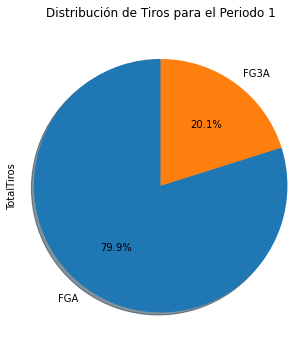

In [40]:
# Creamos nuestro gráfico de Pie

df1_pie['TotalTiros'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # añadimos porcentajes
                            startangle=90,     # ángulo de comienzo
                            shadow=True,       # añadimos sombra      
                            )

plt.title('Distribución de Tiros para el Periodo 1')
plt.axis('equal') 

plt.show()

In [41]:
# Transponemos nuestra base de datos
df2_pie=df2[['FGA','FG3A']]
df2_pie

,FGA,FG3A
0,82,25
1,77,27
2,83,24
3,81,36
4,91,25
...,...,...
7938,67,22
7939,65,24
7940,76,33
7941,71,24


In [42]:
df2_pie=df2_pie.T
df2_pie

,0,1,2,3,4,5,6,7,8,9,...,7933,7934,7935,7936,7937,7938,7939,7940,7941,7942
FGA,82,77,83,81,91,81,87,85,88,74,...,80,81,80,83,77,67,65,76,71,86
FG3A,25,27,24,36,25,33,27,37,45,31,...,35,35,33,27,34,22,24,33,24,26


In [43]:
df2_pie['TotalTiros']=df2_pie.sum(axis=1)
df2_pie

,0,1,2,3,4,5,6,7,8,9,...,7934,7935,7936,7937,7938,7939,7940,7941,7942,TotalTiros
FGA,82,77,83,81,91,81,87,85,88,74,...,81,80,83,77,67,65,76,71,86,683233
FG3A,25,27,24,36,25,33,27,37,45,31,...,35,33,27,34,22,24,33,24,26,241180


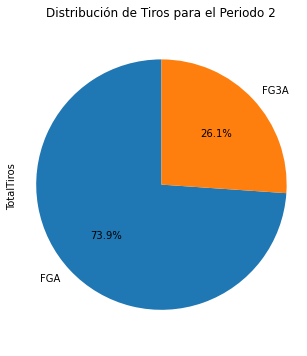

In [44]:

df2_pie['TotalTiros'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,      # add shadow      
                            )

plt.title('Distribución de Tiros para el Periodo 2')
plt.axis('equal')

plt.show()

#### Juntamos las gráficas

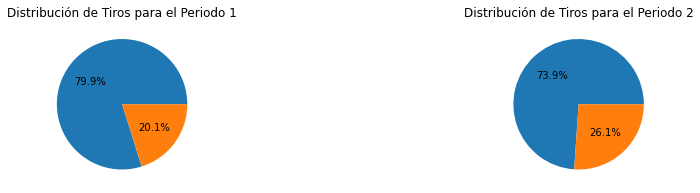

In [45]:
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.pie(df1_pie['TotalTiros'], autopct='%1.1f%%' )
ax1.set_title('Distribución de Tiros para el Periodo 1')
ax2.pie(df2_pie['TotalTiros'], autopct='%1.1f%%')
ax2.set_title('Distribución de Tiros para el Periodo 2')

plt.show()

#### Gráfico de lineas

In [46]:
df.head()

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42


In [47]:
# Creamos una subbase con la que ya tenemos anteriormente
df_line=df
df_line

,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42
...,...,...,...,...,...,...,...,...,...
15771,2021-08-04,Los Angeles Lakers,84,27,67,6,22,89,33
15772,2021-08-04,Miami Heat,94,31,65,9,24,89,40
15773,2021-08-03,Golden State Warriors,89,33,76,10,33,109,43
15774,2021-08-03,Miami Heat,80,33,71,7,24,95,40


In [48]:
#Obtenemos el año
df_line['Year']=df_line['Fecha'].dt.year
df_line

<ipython-input-48-d00f75a0be72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line['Year']=df_line['Fecha'].dt.year


,Fecha,Equipo,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados,Year
0,2011-06-12,Dallas Mavericks,105,41,82,11,26,108,52,2011
1,2011-06-09,Dallas Mavericks,112,39,69,13,19,88,52,2011
2,2011-06-07,Dallas Mavericks,86,29,73,4,19,92,33,2011
3,2011-06-05,Miami Heat,88,34,78,8,19,97,42,2011
4,2011-06-02,Dallas Mavericks,95,36,75,6,17,92,42,2011
...,...,...,...,...,...,...,...,...,...,...
15771,2021-08-04,Los Angeles Lakers,84,27,67,6,22,89,33,2021
15772,2021-08-04,Miami Heat,94,31,65,9,24,89,40,2021
15773,2021-08-03,Golden State Warriors,89,33,76,10,33,109,43,2021
15774,2021-08-03,Miami Heat,80,33,71,7,24,95,40,2021


In [65]:
df_line.columns

Index(['Fecha', 'Equipo', 'PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Total Tiros',
       'Total Tiros Encestados', 'Year'],
      dtype='object')

In [49]:
#Acomodamos las columnas de nuestra base
df_line=df_line[['Year','PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'Total Tiros',
       'Total Tiros Encestados']]

In [50]:
# Agrupamos la base por el año
df_line=df_line.groupby(['Year'],as_index=False).sum()

In [51]:
df_line

,Year,PTS,FGM,FGA,FG3M,FG3A,Total Tiros,Total Tiros Encestados
0,2010,69002,25162,52614,4621,11782,64396,29783
1,2011,95314,35384,73598,6394,16609,90207,41778
2,2012,168430,63312,134542,11888,31360,165902,75200
3,2013,156571,58514,122689,12084,31126,153815,70598
4,2014,161985,59741,124843,12942,33557,158400,72683
5,2015,158561,58648,125441,13357,35330,160771,72005
6,2016,164506,60732,127595,14839,38497,166092,75571
7,2017,167182,61600,127670,16479,42337,170007,78079
8,2018,167683,61858,128756,17126,44809,173565,78984
9,2019,165903,60683,126560,18118,47556,174116,78801


In [52]:
# Filtramos las columnas que deseamos utilizar para la gráfica de línea
df_line_final=df_line[['FGA','FG3A']]

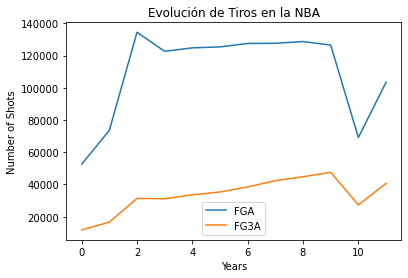

In [53]:
df_line_final.plot(kind='line')

plt.title('Evolución de Tiros en la NBA')
plt.ylabel('Number of Shots')
plt.xlabel('Years')

plt.show()